## AAND: Numerical Problem Set 5
Leonard Hollander

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from estimate_decoder import estimate_decoder as estDec

Disclaimer: I really intended to spend much more time this week on sorting out the units and everything. However, 

$\textbf{Exercise 1: Stimulus decoding}$

In [2]:
#Global variables: 
#Mental note: keep an eye out for units

dt = .005 #in seconds
maxTime = 500 # trial length in seconds
TIME_RANGE = np.arange(0, maxTime ,dt) #in seconds
mu, sigma = 0,2

#Kernel variables:
r0 = 200 #spikes/second
A = 200 #spikes/second^2
taucos = .02 #seconds
sigmacos = .14 #seconds
sigmaexp = .06 #seconds

Text(63.125, 0.5, 'Time steps within individual second')

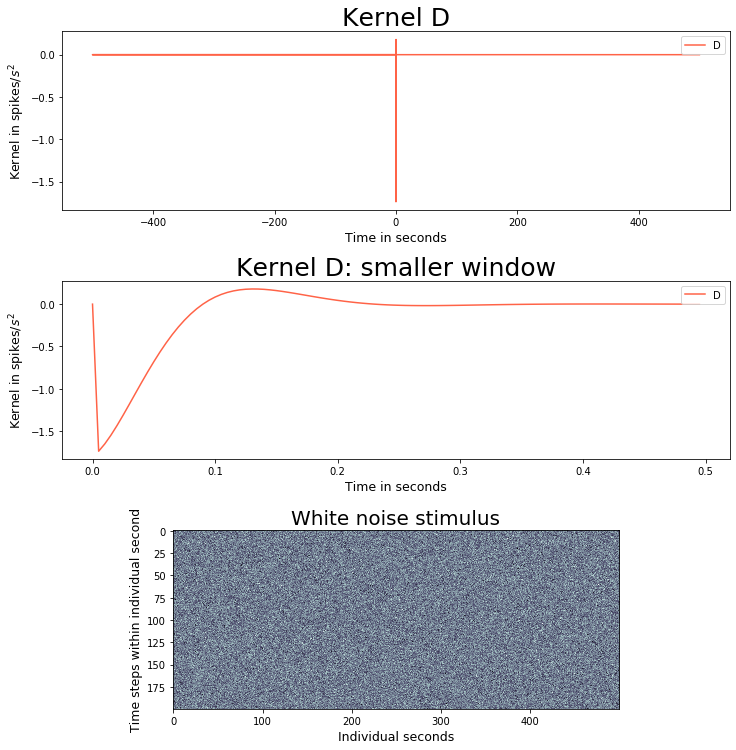

In [11]:
#Part(a): Generate a Gaussian white-noise stimulus

stimulusWN = np.zeros(int(maxTime/dt)) 

for index in np.arange(0,len(stimulusWN)):

    stimulusWN[index] = np.random.normal(0,np.sqrt(2)/dt)

#Part(b): Define Kernel

def kernelD(tau, amp=A, tcos=taucos, scos=sigmacos, sexp=sigmaexp):
    
    envelope = np.exp(-tau/sexp)
    trigo = 2 * np.cos(np.pi * (tau - tcos) / scos)
    
    return -amp*trigo*envelope

#Define causal kernel D:

D = lambda tau: 0 if tau <= 0 else kernelD(tau)
kernel = np.array(list(map(D, np.concatenate((-TIME_RANGE, TIME_RANGE)))))
kernel *= dt #to spikes/second

fig, axs = plt.subplots(3,1, figsize=(10,10))
fig.tight_layout(h_pad=5)

#Plot the kernel:
axs[0].plot(np.concatenate((-TIME_RANGE, TIME_RANGE)),\
            kernel, c='tomato', label='D')
axs[0].set_xlabel('Time in seconds', fontsize=12.5)
axs[0].set_ylabel(r'Kernel in spikes/$s^2$', fontsize=12.5)
axs[0].set_title('Kernel D', fontsize=25)
axs[0].legend()


#Plot kernel in smaller window:
axs[1].plot(np.arange(0,.5,dt), kernel[100000: 100100], c='tomato', label='D')
axs[1].set_xlabel('Time in seconds', fontsize=12.5)
axs[1].set_ylabel(r'Kernel in spikes/$s^2$', fontsize=12.5)
axs[1].set_title('Kernel D: smaller window', fontsize=25)
axs[1].legend()


#PLot the stimulus:
axs[2].imshow(stimulusWN.reshape(200,500), cmap='bone')
axs[2].set_title('White noise stimulus', fontsize=20)
axs[2].set_xlabel('Individual seconds', fontsize=12.5)
axs[2].set_ylabel('Time steps within individual second', fontsize=12.5)


Here we can see the kernel and the white noise stimulus. The graphic for the white noise stimulus represents the stimulus in the following way: every column represents a full second. Each second is divided into the saplng rate intervals that appear on the y-axis.

In [12]:
#Get the estimated rate:
start= timer()
rEst = r0 + np.convolve(kernel,stimulusWN, mode='same')
rEst *= dt
end  = timer()

print('Time needed for convolution: {}'.format(end-start))

Time needed for convolution: 10.831760120000013


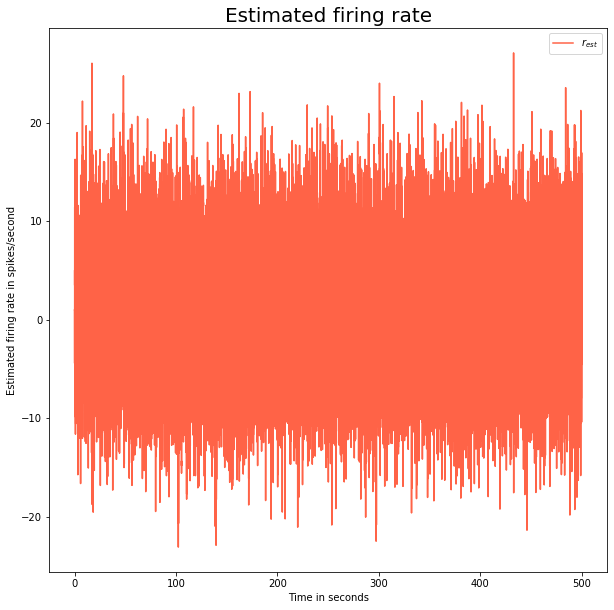

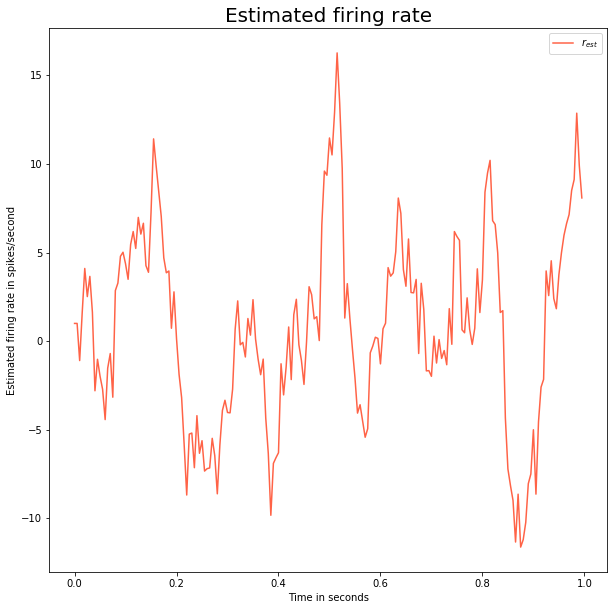

In [21]:
#Plot result:

plt.figure(figsize=(10,10))
plt.plot(TIME_RANGE, rEst[50000:150000], c='tomato',\
         label= r'$r_{est}$')
plt.title('Estimated firing rate', fontsize=20)
plt.xlabel('Time in seconds')
plt.ylabel('Estimated firing rate in spikes/second')
plt.legend()

#Take a closer look: first second

firstSec = np.arange(0,1,dt)

plt.figure(figsize=(10,10))
plt.plot(firstSec, rEst[50000:50200], c='tomato',\
         label= r'$r_{est}$')
plt.title('Estimated firing rate', fontsize=20)
plt.xlabel('Time in seconds')
plt.ylabel('Estimated firing rate in spikes/second')
plt.legend()

This makes sense. Our stimulus is white noise, so there should be a lot of noise in the result. Nevertheless we can see some periodicty as well from the cosinusoidal kernel.

In [14]:
#Part(c): Compute the autocorrelation:

base = rEst - r0 #baseline response
corr = np.correlate(rEst, rEst, 'same') * dt/maxTime

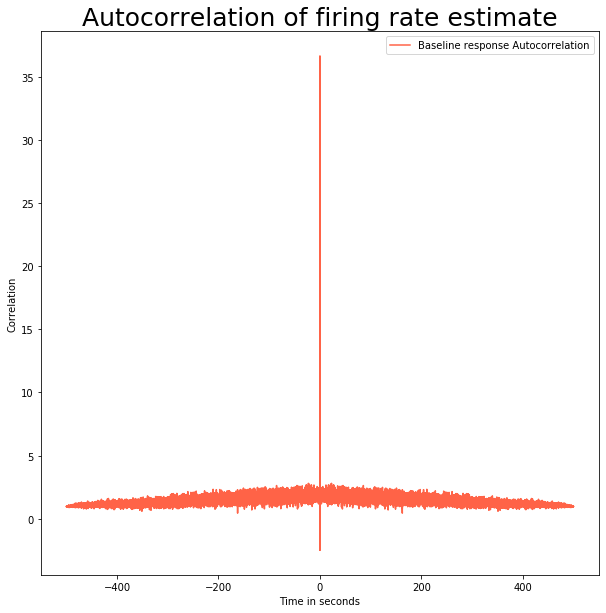

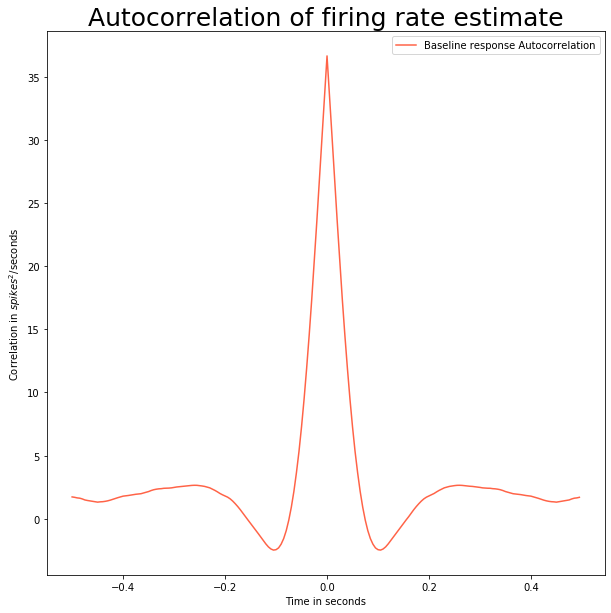

In [24]:

plt.figure(figsize=(10,10))
plt.plot(np.arange(-maxTime, maxTime, dt), corr, c='tomato',\
        label='Baseline response Autocorrelation')
plt.title('Autocorrelation of firing rate estimate', fontsize =25)
plt.xlabel('Time in seconds')
plt.ylabel('Correlation') #adjust units
plt.legend()

#Let's take a closer look:
plt.figure(figsize=(10,10))
plt.plot(np.arange(-.5,.5,dt), corr[99900:100100], c='tomato',\
        label='Baseline response Autocorrelation')
plt.title('Autocorrelation of firing rate estimate', fontsize =25)
plt.xlabel('Time in seconds')
plt.ylabel('Correlation in $spikes^2$/seconds') #adjust units
plt.legend()

This is to be expected. Since the stimulus is noise, it has little to no correlation across time, so there should be very little correlation outside a range determined by the variances of the kernel, which are very small.

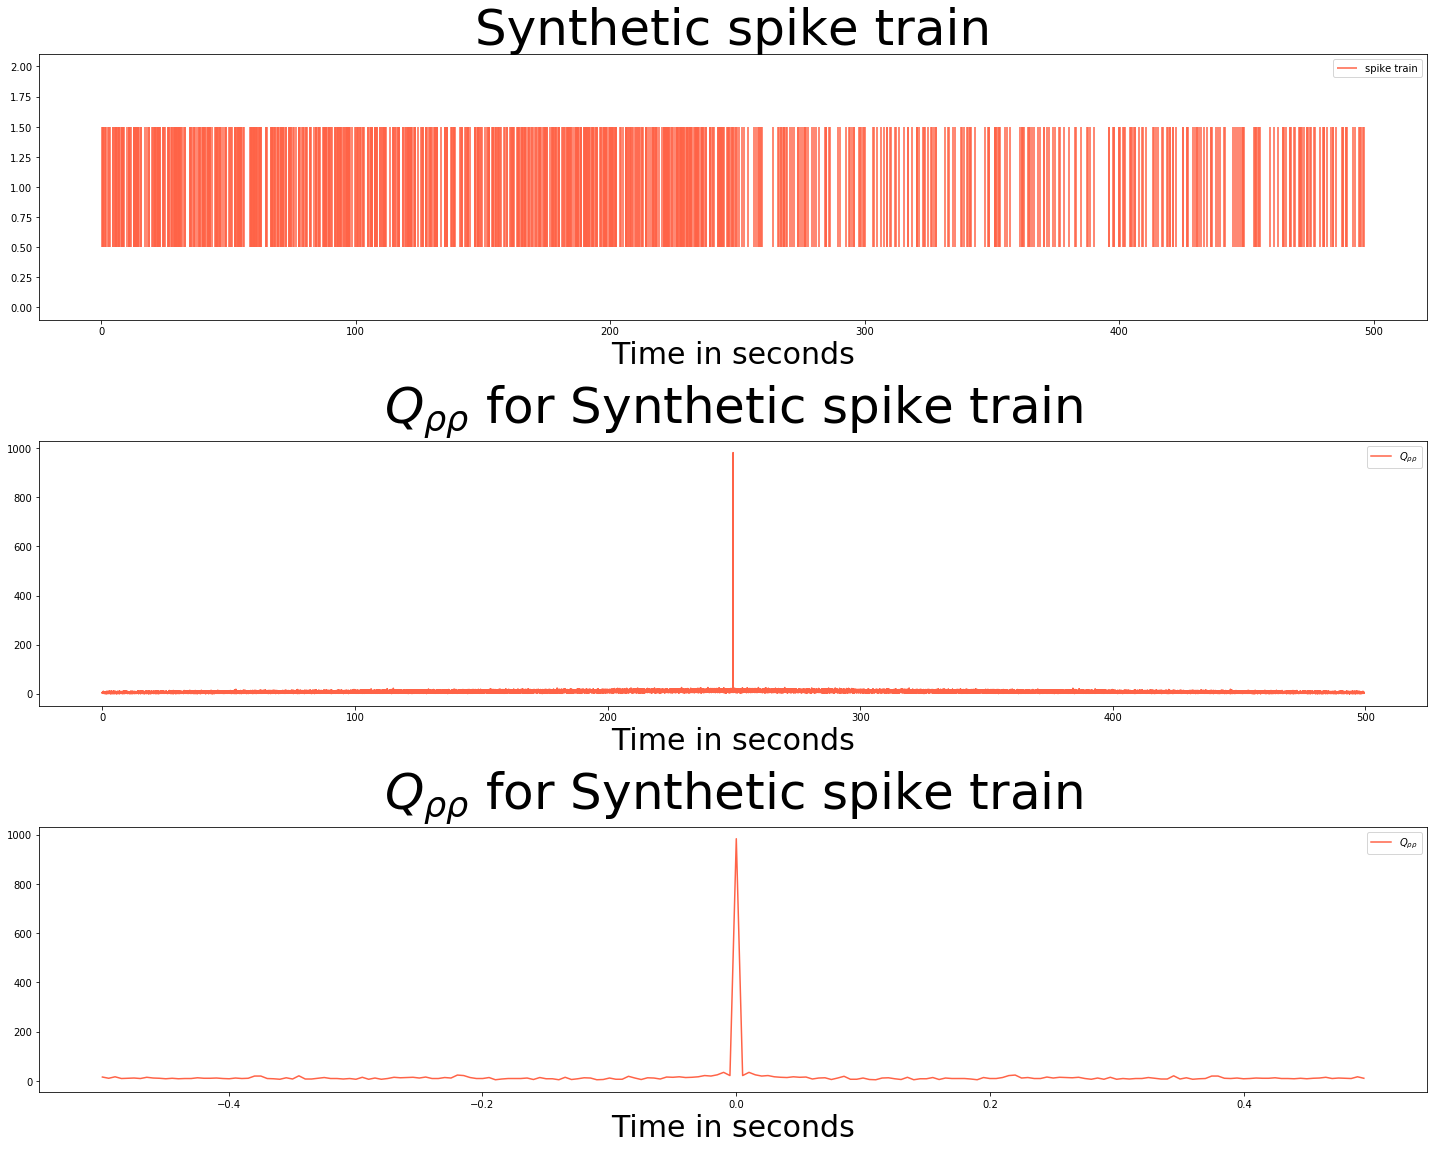

In [35]:
#Part(d): Generate a spike train from inhomogenous Poisson process

#Generate synthetic spike train:
rhoSynthetic = np.zeros(len(TIME_RANGE))
randNums = np.random.uniform(size=len(TIME_RANGE))
rhoSynthetic[randNums<rEst[100000:]*dt] = 1/dt

#Get spike times:
spikeTimes = np.where(rhoSynthetic)[0]*dt
frate = (spikeTimes*dt).sum()/maxTime 

#Comoute spike train correlation:
spikeTrainCorr = np.correlate(rhoSynthetic, rhoSynthetic, 'same')
spikeTrainCorr *= dt 
spikeTrainCorr -= np.power(frate,2)
spikeTrainCorr *= dt



#Plot everything:
fig, axs = plt.subplots(3,1, figsize=(20,15))
fig.tight_layout(h_pad=10)


axs[0].eventplot(spikeTimes, color='tomato', label='spike train')
axs[0].set_title("Synthetic spike train", fontsize=50)
axs[0].set_xlabel("Time in seconds", fontsize=30)
axs[0].legend()

axs[1].plot(TIME_RANGE-TIME_RANGE/2*dt/2, spikeTrainCorr, color='tomato', label=r'$Q_{\rho\rho}$')
axs[1].set_title(r'$Q_{\rho\rho}$ for Synthetic spike train', fontsize=50)
axs[1].set_xlabel("Time in seconds", fontsize=30)
axs[1].legend()

#Take a closer look:

trange = np.arange(-.5,.5,dt)

axs[2].plot(trange-trange/2*dt/2, spikeTrainCorr[49900:50100], color='tomato', label=r'$Q_{\rho\rho}$')
axs[2].set_title(r'$Q_{\rho\rho}$ for Synthetic spike train', fontsize=50)
axs[2].set_xlabel("Time in seconds", fontsize=30)
axs[2].legend()


This, again, is as expected. The spike train autocorrelation is close to zero almost everywhere, except at 0, which fits the profile of a stimulus illicited by random white noise.

In [27]:
#Part(e): Compute the autocorrelation for the encoding filter D:

dCorr = np.correlate(kernel,kernel,'same')*dt/maxTime

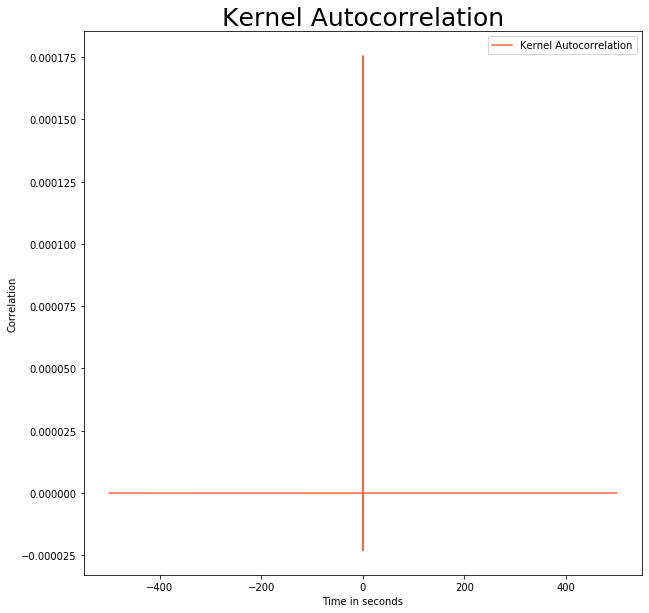

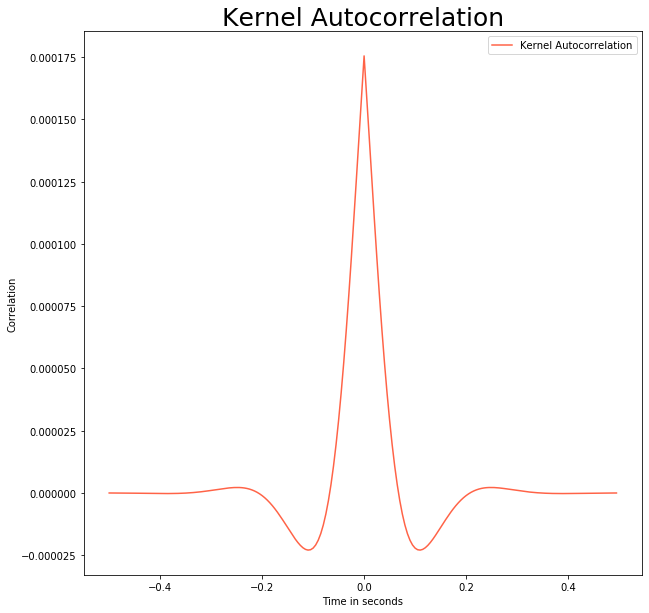

In [29]:
#Plot results:
plt.figure(figsize=(10,10))
plt.plot(np.arange(-maxTime, maxTime, dt), dCorr, c='tomato',\
        label= 'Kernel Autocorrelation')
plt.title('Kernel Autocorrelation',fontsize=25)
plt.xlabel('Time in seconds')
plt.ylabel('Correlation')
plt.legend()

#Take a closer look:
plt.figure(figsize=(10,10))
plt.plot(np.arange(-.5,.5,dt), dCorr[99900:100100], c='tomato',\
        label= 'Kernel Autocorrelation')
plt.title('Kernel Autocorrelation',fontsize=25)
plt.xlabel('Time in seconds')
plt.ylabel('Correlation')
plt.legend()


Obseravtion: the autocorrelations for the encoding filter, the rate estimate and the spike Train all have the same overall shape. This shape is determined by the shape of the kernel autocorrelation, with small amounts of random noise added on top for the the latter two, which is due to the noise in the stimulus.

In [ ]:
#Part(f): The estimate_decoder function throws a ValueError when I run it. No idea why.b

In [38]:
np.log2(1021/1024)*(-1021/1024) + 30/102

0.29833809525585936